# Image and XML Representations in SAP-SAM
This notebook provides a brief tutorial on how to access image and XML representation of SAP-SAM models.
In particular, images can be generated using the REST API of SAP Signavio Process Manager (academic edition) and the XML files of the SAP-SAM BPMN 2.x diagrams (with a handful of exceptions) have been published with the January 2023 update of SAP-SAM.

## Setup
In order to render images or generate BPMN 2.x XML files, we need to create an account on [academic.signavio.com](academic.signavio.com) or on a commercial SAP Signavio system instance. To setup the integration with your SAP Signavio workspace, we create a file named ``conf.py`` in the `notebooks` directory of this project and specify the following variables:

* ``email``: the email address with which you have registered your account.
* ``pw``: your password -- use a password you do not use elsewhere and do not commit/share the ``conf.py`` file.
* ``tenant_id``: the ID of your workspace, which can be obtained by selecting **Help** - **Workspace information** in the explorer of SAP Signavio Process Manager.
* ``system_instance``: ``'https://academic.signavio.com'`` or the URL of a commercial system instance.

Below, we see an example configuration file:

```
email = 'jane@doe.org'
pw = '1234546'
tenant_id = 'cb0f0496e0ca1234562e881f9f654321'
system_instance = https://academic.signavio.com
```

This allows the underlying code to upload diagrams to a specific folder (named `SAP-SAM`) in your workspace so that the server can generate an image (PNG) or XML representation.
The folder does not need to be created manually (the SAP-SAM API takes care of this).

We import the following dependencies to get started:

In [1]:
import sys
sys.path.append("../src")

In [2]:
from IPython.display import Image, display
import json
import pandas as pd
import xml.etree.ElementTree as ET
pd.set_option("display.min_rows", 4)
from sapsam import parser, constants
from sapsam.RepresentationGenerator import RepresentationGenerator

## Loading SAP-SAM content

Let us now load a SAP-SAM model (in JSON format) that we want to turn into a graphical model (PNG) and into a standard-compliant BPMN 2.0 XML file:

In [3]:
csv_paths = parser.get_csv_paths()
csv_path = csv_paths[0]
df_raw = pd.read_csv(csv_path, nrows=20)

In addition, we need the model's namespace and name:

In [4]:
model_json = df_raw["Model JSON"][2]
model_namespace = df_raw["Namespace"][2]
model_name = df_raw["Name"][1]
print('Namespace:', model_namespace)
print('Name:', model_name)

Namespace: http://b3mn.org/stencilset/bpmn2.0#
Name: Lösung zu Übung 1 BKMs Finanzierungsvergleich


## Rendering PNG images

Now, we can use the SAP-SAM API to create the diagram in SAP Signavio Process Manager and have it generate the image:

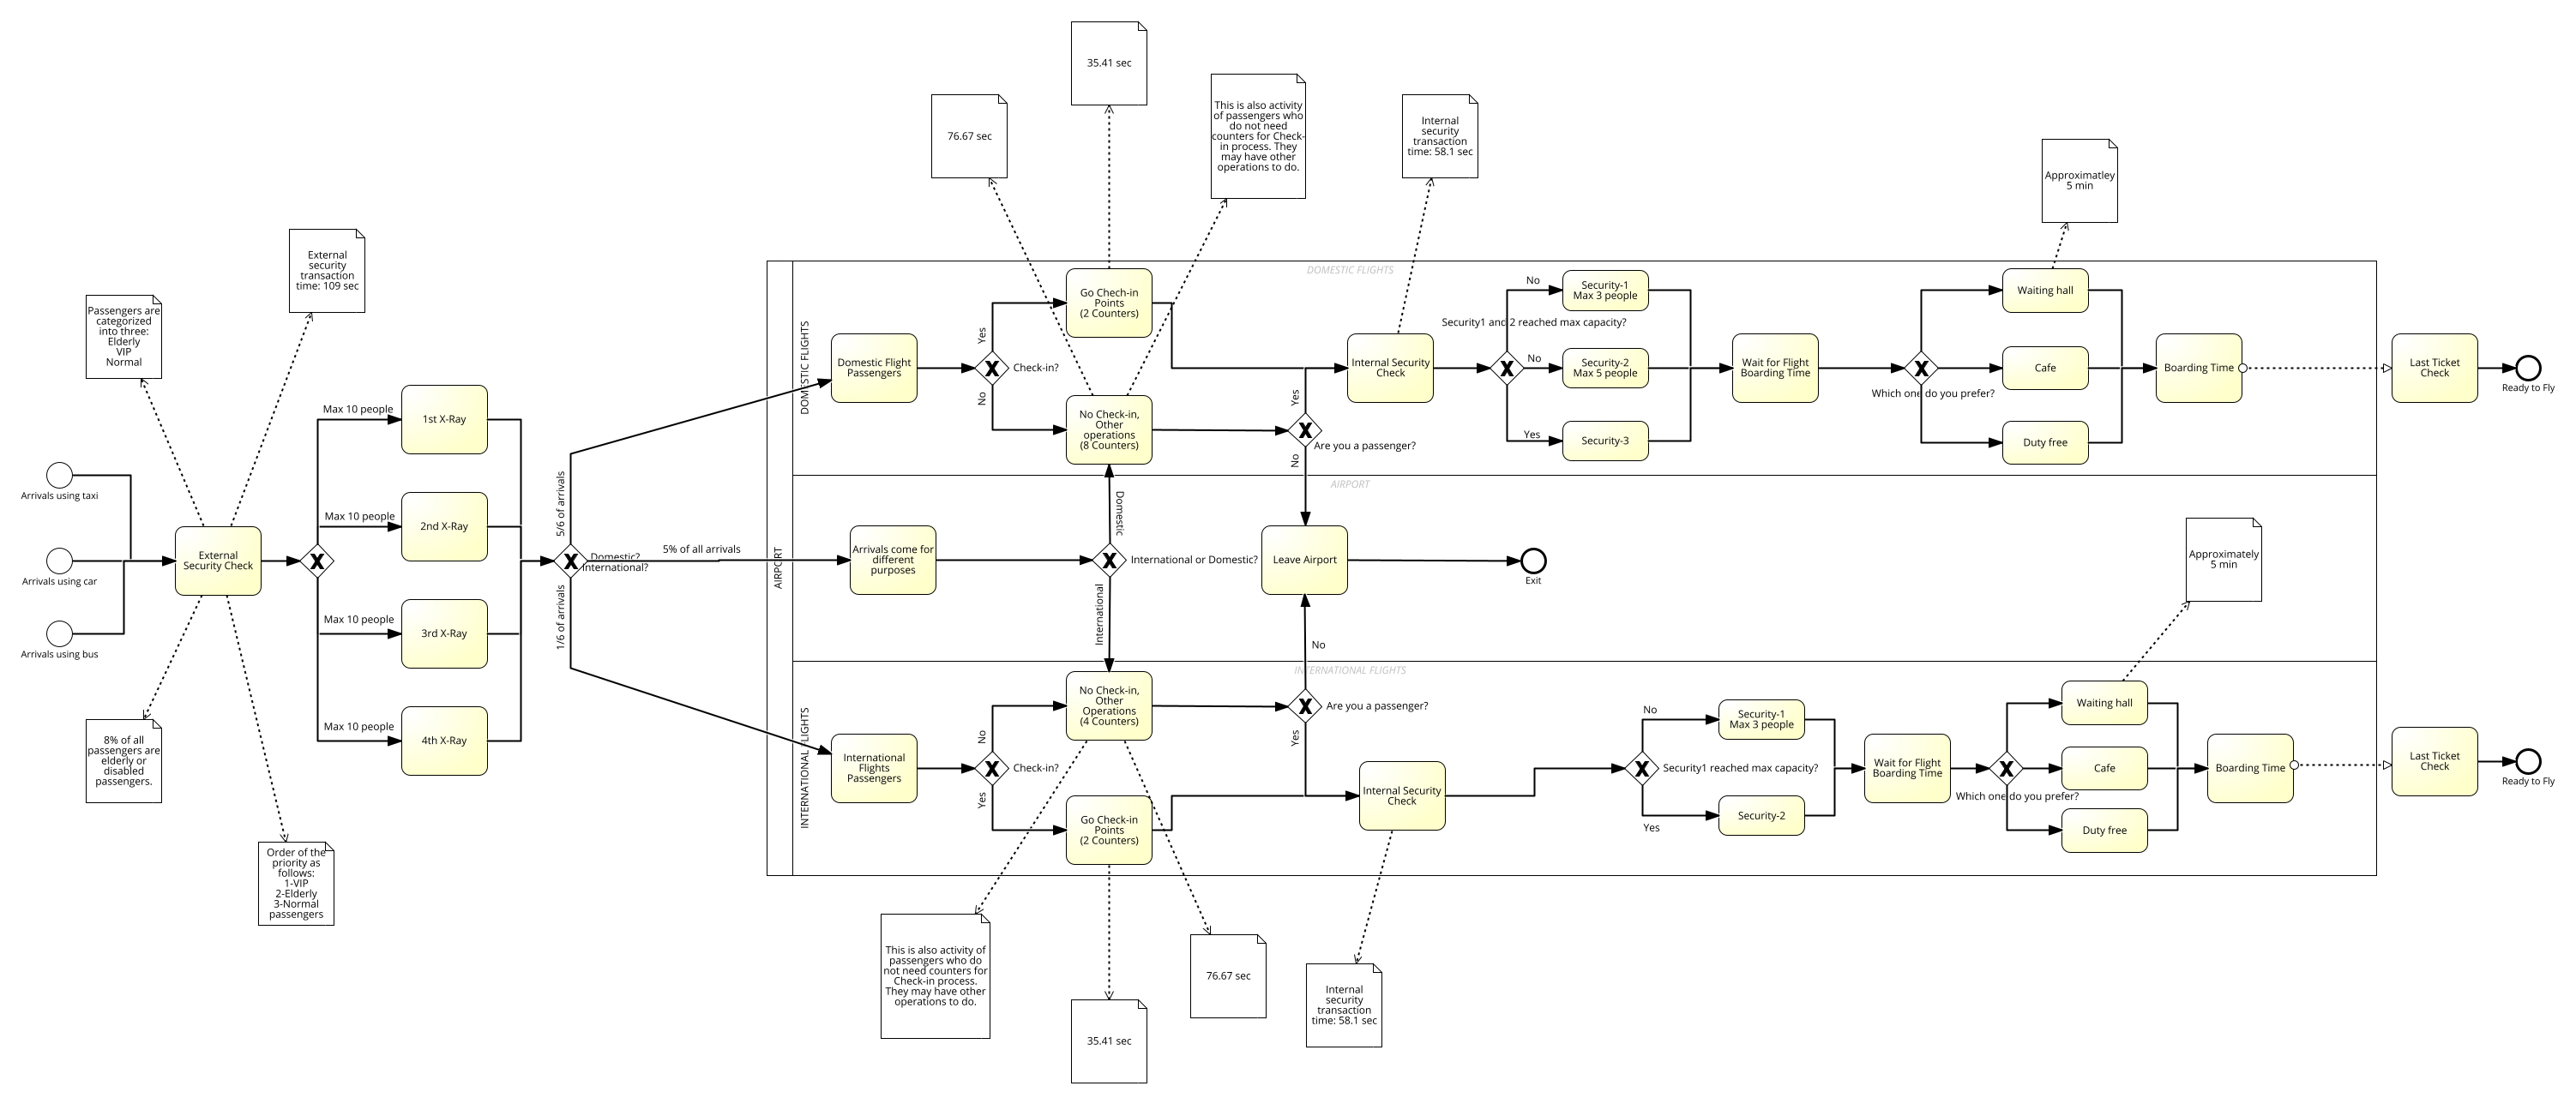

In [5]:
gen = RepresentationGenerator()
image_request = gen.generate_image(model_name, model_json, model_namespace, deletes=False)
display(Image(image_request))

Note that the diagram was stored in the `SAP-SAM` folder of the SAP Signavio workspace, but is deleted immediately after the PNG is obtained. In case deletion is undesired, change the method call to `gen.generate_image(model_name, model_json, model_namespace, deletes=False)`.

## Generating XML representation

We can generate XML representations for BPMN and DMN in an analogous manner.

### BPMN 2.0

In [ ]:
import io

In [ ]:
# comment this section if generating a DMN XML
xml_request = io.StringIO(gen.generate_bpmn_xml(model_name, model_json, model_namespace).decode("utf-8"))
xml_tree = ET.parse(xml_request)
root = xml_tree.getroot()
print(ET.tostring(root,encoding="unicode",method="xml"))

### DMN 1.0

In [ ]:
# uncomment this section if generating a DMN XML
# xml_request = io.StringIO(gen.generate_dmn_xml(model_name, model_json, model_namespace).decode("utf-8"))
# xml_tree = ET.parse(xml_request)
# root = xml_tree.getroot()
# print(ET.tostring(root,encoding="unicode",method="xml"))